In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    confusion_matrix,
    classification_report,
    accuracy_score)

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, Lasso, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB, CategoricalNB

import warnings

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Data/winequality-red.csv")

In [3]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


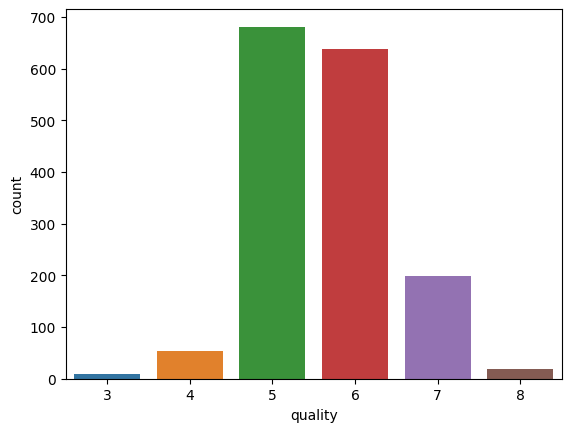

In [5]:
sn.countplot(df.quality)
plt.show()

In [6]:
df['quality'] = df['quality'].replace(3, 5)
df['quality'] = df['quality'].replace(4, 5)
df['quality'] = df['quality'].replace(7, 6)
df['quality'] = df['quality'].replace(8, 6)

df.quality.value_counts()

6    855
5    744
Name: quality, dtype: int64

In [7]:
cols =['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

In [19]:
def remove_outliers(col):
    Q1, Q3 = np.percentile(col, [25, 75])
    IQR = Q3 - Q1
    
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range 

for column in cols:
    lr, ur = remove_outliers(df[column])
    df[column] = np.where(df[column]>ur, ur, df[column])
    df[column] = np.where(df[column]<lr, lr, df[column])

In [20]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.290901,0.526429,0.270922,2.322358,0.081194,15.689181,45.714822,0.996742,3.310353,0.649831,10.419627,5.534709
std,1.655860,0.174045,0.194614,0.609493,0.017822,9.837494,30.374029,0.001806,0.149851,0.137086,1.054808,0.498950
min,4.600000,0.120000,0.000000,0.900000,0.040000,1.000000,6.000000,0.992248,2.925000,0.330000,8.400000,5.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,12.350000,1.015000,0.915000,3.650000,0.120000,42.000000,122.000000,1.001187,3.685000,1.000000,13.500000,6.000000


<Axes: >

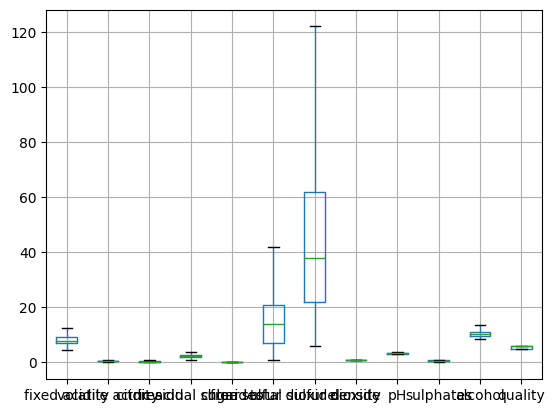

In [21]:
df.boxplot()

In [22]:
X = df.drop("quality", axis=1)

In [24]:
y = df.quality
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [25]:
numeric_feature = MinMaxScaler()
X = numeric_feature.fit_transform(X)

In [26]:
X

array([[0.36129032, 0.64804469, 0.        , ..., 0.76973684, 0.34328358,
        0.19607843],
       [0.41290323, 0.84916201, 0.        , ..., 0.36184211, 0.52238806,
        0.2745098 ],
       [0.41290323, 0.7150838 , 0.04371585, ..., 0.44078947, 0.47761194,
        0.2745098 ],
       ...,
       [0.21935484, 0.43575419, 0.1420765 , ..., 0.65131579, 0.62686567,
        0.50980392],
       [0.16774194, 0.58659218, 0.13114754, ..., 0.84868421, 0.56716418,
        0.35294118],
       [0.18064516, 0.2122905 , 0.5136612 , ..., 0.61184211, 0.49253731,
        0.50980392]])

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
X_train.shape, X_test.shape

((1279, 11), (320, 11))

In [29]:
y_train.shape, y_test.shape

((1279,), (320,))

In [34]:
X_train, X_test

(array([[0.52903226, 0.63687151, 0.33879781, ..., 0.73026316, 0.6119403 ,
         0.62745098],
        [0.19354839, 0.10055866, 0.43715847, ..., 0.42763158, 0.3880597 ,
         0.68627451],
        [0.81290323, 0.30167598, 0.5136612 , ..., 0.49342105, 0.62686567,
         0.2745098 ],
        ...,
        [0.33548387, 0.55865922, 0.06557377, ..., 0.76973684, 0.31343284,
         0.21568627],
        [0.42580645, 0.08938547, 0.38251366, ..., 0.51973684, 0.70149254,
         0.68627451],
        [0.15483871, 0.18994413, 0.28415301, ..., 0.61184211, 0.31343284,
         1.        ]]),
 array([[0.4       , 0.49162011, 0.08743169, ..., 0.41447368, 0.49253731,
         0.23529412],
        [0.41290323, 0.42458101, 0.18579235, ..., 0.61184211, 0.2238806 ,
         0.21568627],
        [0.78709677, 0.61452514, 0.24043716, ..., 0.46710526, 0.97014925,
         0.29411765],
        ...,
        [0.47741935, 0.53631285, 0.27322404, ..., 0.29605263, 0.29850746,
         0.2745098 ],
        [0.5

In [56]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)

y_train, y_test

(array([1, 1, 1, ..., 0, 1, 1], dtype=int64),
 array([1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
        0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
        0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
        1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
        1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
        1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
        0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
        1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
        1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
        0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
        1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1

### Evaluate Function to give all metrics after model training

In [68]:
# def evaluate_model(true, predicted):
#     mae = mean_absolute_error(true, predicted)
#     mse = mean_squared_error(true, predicted)
#     rmse = np.sqrt(mean_squared_error(true, predicted))
#     r2_squared = r2_score(true, predicted)
#     return mae, rmse, r2_squared

In [39]:
models = {
    'DecisionTreeClassifier' : DecisionTreeClassifier(),
    'LogisticRegression' : LogisticRegression(),
    'KNeighborsClassifier' : KNeighborsClassifier(),
    'SVC' : SVC(),
    'RandomForestClassifier' : RandomForestClassifier(),
    'XGBClassifier' : XGBClassifier(),
#     'CatBoostClassifier' : CatBoostClassifier(verbose=False),
    'AdaBoostClassifier' : AdaBoostClassifier(),
    'ElasticNet' : ElasticNet(),
    'ExtraTreesClassifier' : ExtraTreesClassifier()
}

model_list = []
score_list = []
train_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    train_list.append(train_score)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    model_list.append(list(models.keys())[i])
    
    print(f"Model Performance of Training set of {list(models.keys())[i]}")
    print(f"Train Score: {train_score}")
    
    print("------------------------------------------------------------------")
    
    print(f"Model Performance of Test set of {list(models.keys())[i]}")
    print(f"Train Score: {test_score}")
    score_list.append(test_score)
    
    print("="*35)
    print('\n')

Model Performance of Training set of DecisionTreeClassifier
Train Score: 1.0
------------------------------------------------------------------
Model Performance of Test set of DecisionTreeClassifier
Train Score: 0.74375


Model Performance of Training set of LogisticRegression
Train Score: 0.7458952306489445
------------------------------------------------------------------
Model Performance of Test set of LogisticRegression
Train Score: 0.734375


Model Performance of Training set of KNeighborsClassifier
Train Score: 0.8146989835809226
------------------------------------------------------------------
Model Performance of Test set of KNeighborsClassifier
Train Score: 0.71875


Model Performance of Training set of SVC
Train Score: 0.7974980453479281
------------------------------------------------------------------
Model Performance of Test set of SVC
Train Score: 0.75625


Model Performance of Training set of RandomForestClassifier
Train Score: 1.0
-----------------------------------

In [40]:
pd.DataFrame(list(zip(model_list, score_list, train_list)), columns=['Model Name', 'Test Score', 'Train Score']).sort_values(by=['Test Score'], ascending=False, ignore_index=True)

,Model Name,Test Score,Train Score
0,ExtraTreesClassifier,0.818750,1.000000
1,XGBClassifier,0.793750,1.000000
2,RandomForestClassifier,0.787500,1.000000
3,SVC,0.756250,0.797498
4,DecisionTreeClassifier,0.743750,1.000000
5,LogisticRegression,0.734375,0.745895
6,KNeighborsClassifier,0.718750,0.814699
7,AdaBoostClassifier,0.715625,0.790461
8,ElasticNet,-0.003858,0.000000


Now we will doing **Hyperparameter Tuning.** For how to choose best model.

In [41]:
model_params = {
    'svm':{
        'model' : SVC(gamma='auto'),
        'params' :{
            'C' : [1, 10, 20],
            'kernel' : ['rbf', 'linear']
        }
    },
    'random_forest' :{
        'model' : RandomForestClassifier(),
        'params' : {
            'n_estimators' : [1,5,10]
        }
    },
    'logistic_regression' :{
        'model' : LogisticRegression(solver='liblinear', multi_class='auto'),
        'params' : {
            'C': [1,5,10],
            'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky','sag', 'saga']
        }
    },
    'decision_tree' : {
        'model' : DecisionTreeClassifier(),
        'params' :{
            'criterion': ['gini', 'entropy', 'log_loss'],
            'splitter' : ['best', 'random']
        }
    },
    'knn' : {
        'model' : KNeighborsClassifier(),
        'params' :{
            'n_neighbors' : [1,5,11],
            'weights' : ['uniform', 'distance'],
            'algorithm' : ['ball_tree', 'kd_tree', 'brute']
        }
    },
    'ExtraTreesClassifier' :{
        'model' : ExtraTreesClassifier(),
        'params' : {
            'criterion': ['gini', 'entropy', 'log_loss'],
            'n_estimators' : [8, 16, 32, 64, 128, 256] 
        }
    },
    'Adaboost' :{
        'model' : AdaBoostClassifier(),
        'params' : {
            'learning_rate' : [.1, .01, .05, .001],
            'n_estimators' : [8, 16, 32, 64, 128, 256]  
        }
    },
    'XGBRegressor' :{
        'model' : XGBClassifier(),
        'params' : {
            'learning_rate' : [.1, .01, .05, .001],
            'n_estimators' : [8, 16, 32, 64, 128, 256]  
        }
    }
#     'CatBoostClassifier' :{
#         'model' : CatBoostClassifier(),
#         'params' : {
#             'depth' : [6, 8, 10],
#             'learning_rate' : [.1, .01, .05, .001]  
#         }
#     }
}

In [42]:
scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=3)
    clf.fit(X_train, y_train)
    scores.append({
        'model' : model_name,
        'best_score' : clf.best_score_,
        'best_parameter' : clf.best_params_
    })

In [43]:
pd.DataFrame(scores).sort_values(by='best_score', ignore_index=True)

,model,best_score,best_parameter
0,logistic_regression,0.734172,"{'C': 10, 'solver': 'lbfgs'}"
1,decision_tree,0.740417,"{'criterion': 'entropy', 'splitter': 'best'}"
2,Adaboost,0.747457,"{'learning_rate': 0.05, 'n_estimators': 256}"
3,random_forest,0.757624,{'n_estimators': 10}
4,svm,0.757639,"{'C': 10, 'kernel': 'rbf'}"
5,knn,0.770919,"{'algorithm': 'ball_tree', 'n_neighbors': 5, '..."
6,XGBRegressor,0.777169,"{'learning_rate': 0.05, 'n_estimators': 256}"
7,ExtraTreesClassifier,0.796731,"{'criterion': 'gini', 'n_estimators': 128}"


In [44]:
ExtraTree_model = ExtraTreesClassifier(n_estimators=128, criterion='gini')

In [45]:
ExtraTree_model.fit(X_train, y_train)

ExtraTreesClassifier(n_estimators=128)

In [46]:
ExtraTree_model.score(X_test, y_test)

0.80625

In [47]:
ExtraTree_model.score(X_train, y_train)

1.0

In [48]:
y_pred = ExtraTree_model.predict(X_test)

In [49]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[110,  31],
       [ 31, 148]], dtype=int64)

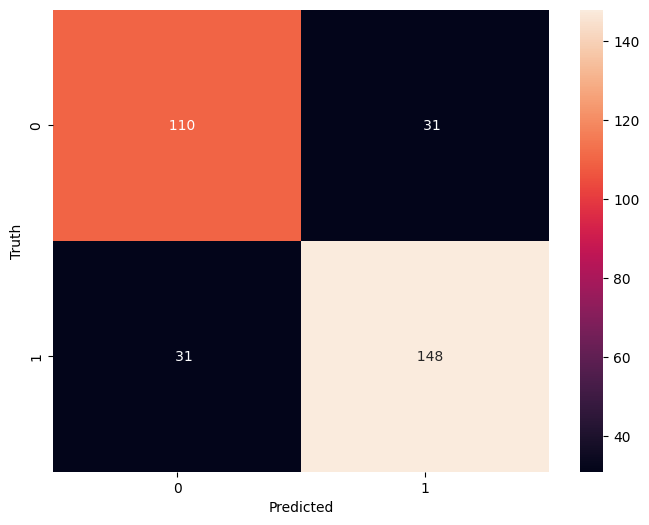

In [50]:
plt.figure(figsize = (8, 6))
sn.heatmap(cm, annot=True, fmt='5g')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78       141
           1       0.83      0.83      0.83       179

    accuracy                           0.81       320
   macro avg       0.80      0.80      0.80       320
weighted avg       0.81      0.81      0.81       320



In [52]:
from sklearn.metrics import auc, roc_curve, roc_auc_score

In [53]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
auc(fpr, tpr)

0.8034787432148659

In [54]:
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

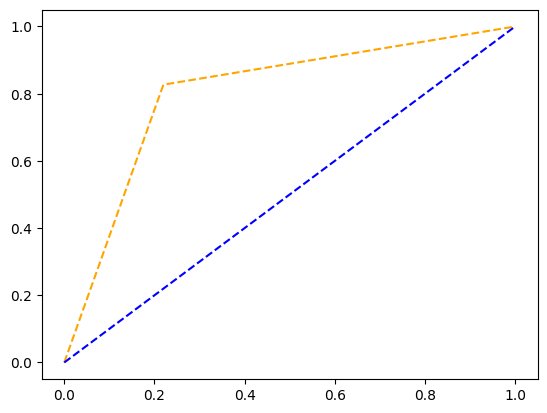

In [55]:
plt.plot(fpr, tpr, linestyle='--',color='orange')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

plt.show()